# Exercise 5: Retrieval

To complete the exercise, follow the instructions and complete the missing code and write the answers where required.  All points, except the ones marked with **(N points)** are mandatory. The optional tasks require more independet work and some extra effort. Without completing them you can get at most 75 points for the exercise (the total number of points is 100 and results in grade 10). Sometimes there are more optional exercises and you do not have to complete all of them, you can get at most 100 points.

## Introduction

In the first part of this exercise you will implement some indexing operations used to retrieve information from a corpus of text documents. As the size of readily available text documents grows beyond all measures, methods for fast and user-friendly querying of information from text files are needed.

Then we will look at some techniques for retrieval of images. We will see how images can be queried using similar techniques than text documents. The exercise concludes with an assigment on evaluation of retrieval systems.


In [1]:
import torch
import torch.nn as nn
from torchvision import models
from torchvision import transforms
from PIL import Image
import os
from skimage import data, io, transform
from matplotlib import pyplot as plt
from PIL import Image

## Assignment 1: Text retrieval

The first assignment will address text retrieval. To make initial processing easy, we will be using NLTK library that you should install if you do not have it on your system.

In [2]:
# General import
import re, math, sys
import numpy as np

# NLTK imports
import nltk
from nltk.corpus import stopwords, gutenberg
from nltk.tokenize import word_tokenize, sent_tokenize

PYTHONIOENCODING="UTF-8"

The **nltk** library includes mechanisms for loading a number of different text corpuses. Load the **Gutenberg corpus** as well as some other resources by using the function ``nltk.download()``. We also download the image material that we will use later in the classical manner.

In [3]:
# Run this cell to download the data used in this exercise - the image dataset
import zipfile, urllib.request, io
zipfile.ZipFile(io.BytesIO(urllib.request.urlopen("http://data.vicos.si/lukacu/multimedia/exercise5.zip").read())).extractall()

# Download Gutenberg corpus
nltk.download('gutenberg')
# Download Punkt Tokenizer Models
nltk.download('punkt')
# Download Stop Words
nltk.download('stopwords')

[nltk_data] Downloading package gutenberg to /home/jovyan/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Then, with the help of the <a href="http://www.nltk.org/book/">NLTK Book</a>, familiarize yourself with the contents and structure of the corpus. If at any point of the exercise you find the Gutenberg corpus too small or otherwise unsuitable for your needs you are welcome to try other corpuses available on the internet.

In [12]:
from nltk.corpus import gutenberg

# TODO: Show structure of Gutenberg corpus
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [13]:
# TODO: familiarize/experiment with the content of Gutenberg corpus
#       e.g. show the number of words, display first few words, ...

# selected text
text = "austen-emma.txt"

# display text in file
raw_file_emma = gutenberg.raw(text)
# print(raw_file_emma)

# display length of the text
emma = gutenberg.words(text)
print("Number of words in %s is %d" %(text, len(emma)))

# print array of words in file
# print(emma)

# print specific array of words
print(emma[10:20])

Number of words in austen-emma.txt is 192427
['I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich']


 * Preprocess the raw data of each document in the Gutenberg corpus using the nltk inbuilt tokenizer. You can use the function ``nltk.word_tokenize()``. Remove stop words and punctuation to further reduce the amount of data you will need to process later on.

In [14]:
# Write a function that recives an array of words obtained from tokenized file
# as an input parameter and returns an array of filtered words
def tokenize_array(file):
    tokenized_file = nltk.word_tokenize(file)
    return tokenized_file

In [15]:
# Preprocess raw data of documents in Gutenberg corpus (use build in tokenizer 'word_tokenize')

teksti = gutenberg.fileids()
teksti_brez_locil = []
raw_files = []

for i in range(len(teksti)):
    raw_files.append(gutenberg.raw(teksti[i]))
    teksti_brez_locil.append(tokenize_array(raw_files[i]))

print(teksti_brez_locil[0][:50])

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with']


 * In order to simplify and speed up operations on sets of documents, they need to be indexed. This allows a fast look up if and where a query word or phrase appears in our corpus. Build an inverted index. For each unique token appearing in your corpus, make a list of the documents it appears in.

In [16]:
from nltk.tokenize import RegexpTokenizer

def tokenizer(file):
    token = RegexpTokenizer('[A-Z]{2,}(?![a-z])|[A-Z][a-z]+(?=[A-Z])|[\'\w\-]+|\$?\d+(?:\.\d+)?%?|(?:[A-Z]\.)+') 
    token_file = token.tokenize(file)
    return token_file

teksti_brez_locil2 = []

for i in range(len(teksti)):
    teksti_brez_locil2.append(tokenizer(raw_files[i]))

print(teksti_brez_locil2[0][:50])

['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', 'She']


In [17]:
# TODO: Write an inverted index structure

dikt = dict()

# emma = tokenizer(raw_files[0])

documents_list = [tokenizer(i) for i in raw_files]
#print(documents_list)

for i, doc in enumerate(documents_list):
    for word in doc:
        word = word.lower()
        # is word in dictionary
        if word in dikt:
            dikt[word]['frequency'] += 1
            if teksti[i] not in dikt[word]['docs']:
                dikt[word]['docs'].add(teksti[i])
        # if word not in dictinary
        else:
            dikt[word] = {'docs': {teksti[i]}, 'frequency': 1}
    
#print(dikt)
print("konec")

konec


 * Index Gutenberg corpus documents and make some queries using Boolean logic (operation AND is an intersection of lists, operation OR is an intersection). Building the entire index takes a lot of time, test your structure on a smaller set (either just a few 100 characters from each document or just three documents), use the entire set when you know that everything works.

    For query "encompass AND furies" the system should return documents: 'whitman-leaves.txt', 'milton-paradise.txt'

    For query "highbury OR behoves" the system should return documents: 'austen-emma.txt', 'milton-paradise.txt'


In [10]:
# TODO: Build an index and make some queries
#for k, v in index.index.items():
#    if len(v) < 10: 
#        print(k)

search_words_and = ["encompass", "furies"]
search_words_or = ["highbury", "behoves"]

and_list = set.intersection(*[dikt[i]['docs'] for i in search_words_and])
or_list = set()
    
for i in search_words_or:
    or_list |= dikt[i]['docs']

print(and_list)
print(or_list)
    
# print(dikt['highbury']['docs'])
# print(dikt.get('behoves'))

{'whitman-leaves.txt'}
{'milton-paradise.txt', 'austen-emma.txt'}


 * Extend your index with a stopword list and a stemmer for faster and more informative retrieval. Since we are assuming that documents are written in English, you can use `nltk.corpus.stopwords.words('english')` to get a list of stopwords. You can use Porter2, aslo known as Snowball stemmer `from nltk.stem.snowball.EnglishStemmer`.

In [11]:
# TODO: Build index with stopword support and a stemmer, demonstrate its use with some examples
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

# print(stopwords.words('english'))

# remove stop words from text
text = raw_files[0]

stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(text)

# convert words in word_token to lower case and checks if they are present in stop_words or not
filtered_text = [w for w in word_tokens if not w.lower() in stop_words]
filtered_text = []

for word in word_tokens:
    if word not in stop_words:
        filtered_text.append(word)

print(filtered_text[:50])

# implementation of Snowball Stemmer
snow_stemmer = SnowballStemmer(language='english')

text = teksti_brez_locil2[0]

stem_words = []
for word in text:
    x = snow_stemmer.stem(word)
    stem_words.append(x)

# print result
i = 0
for x,y in zip(text, stem_words):
    if i > 30: 
        break
    print(x+"--->"+y)
    i += 1

['[', 'Emma', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'rich', ',', 'comfortable', 'home', 'happy', 'disposition', ',', 'seemed', 'unite', 'best', 'blessings', 'existence', ';', 'lived', 'nearly', 'twenty-one', 'years', 'world', 'little', 'distress', 'vex', '.', 'She', 'youngest', 'two', 'daughters', 'affectionate', ',', 'indulgent', 'father', ';', ',', 'consequence']
Emma--->emma
by--->by
Jane--->jane
Austen--->austen
1816--->1816
VOLUME--->volum
I--->i
CHAPTER--->chapter
I--->i
Emma--->emma
Woodhouse--->woodhous
handsome--->handsom
clever--->clever
and--->and
rich--->rich
with--->with
a--->a
comfortable--->comfort
home--->home
and--->and
happy--->happi
disposition--->disposit
seemed--->seem
to--->to
unite--->unit
some--->some
of--->of
the--->the
best--->best
blessings--->bless
of--->of


 * **(5 points)** To allow querying of tokens that occur together (i.e. common phrases), a positional index can be used. Build a positional index on your corpus. This is an extension of the inverted index where each of the list elements containing the document index also stores a list of positions in the document where the token appears. Make sure you properly removed stop words in order to keep your computation relatively fast.

    Use the positional index to query phrases. That is, return the positions in documents where each of the words in your phrase occurs at approximately the same position in the document.

In [12]:
# TODO: Build positional index, demonstrate its use with some examples

# Set up the corpus of documents
# corpus = ['The cat in the hat.', 'The cat sat on the mat.', 'The quick brown fox jumps over the lazy dog.']
corpus = tokenizer(raw_files[0])  #teksti_brez_locil2

# Tokenize the documents and remove stop words
stop_words = set(stopwords.words('english'))

# Initialize the positional index
positional_index = {}

# Iterate through each document in the corpus
for doc_idx, doc in enumerate(corpus):
    # Tokenize the document
    tokens = nltk.word_tokenize(doc)

    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]

    # Iterate through each token in the document
    for pos, token in enumerate(tokens):
        # If the token is not already in the index, add it with an empty list of positions
        if token not in positional_index:
            positional_index[token] = []

        # Add the position of the token to the positional index
        positional_index[token].append((doc_idx, pos))

# Print out the positional index
print(positional_index)

{'Emma': [(0, 0), (9, 0), (147, 0), (206, 0), (228, 0), (319, 0), (618, 0), (901, 0), (1068, 0), (1548, 0), (1929, 0), (1969, 0), (2086, 0), (2106, 0), (2140, 0), (2185, 0), (2256, 0), (2291, 0), (2305, 0), (2415, 0), (3022, 0), (3268, 0), (4578, 0), (4596, 0), (4719, 0), (5183, 0), (5226, 0), (5863, 0), (5997, 0), (6130, 0), (6162, 0), (6323, 0), (6748, 0), (6808, 0), (6921, 0), (6951, 0), (7272, 0), (7399, 0), (7898, 0), (8927, 0), (9013, 0), (9824, 0), (10091, 0), (10226, 0), (10423, 0), (10462, 0), (10483, 0), (10521, 0), (10584, 0), (10680, 0), (10691, 0), (10718, 0), (10821, 0), (10897, 0), (10951, 0), (10997, 0), (11128, 0), (11282, 0), (11328, 0), (11339, 0), (11366, 0), (11440, 0), (11477, 0), (11524, 0), (11540, 0), (11642, 0), (11766, 0), (11813, 0), (11833, 0), (11854, 0), (11930, 0), (11981, 0), (12109, 0), (12138, 0), (12210, 0), (12298, 0), (12339, 0), (12387, 0), (12810, 0), (12981, 0), (13195, 0), (13431, 0), (13968, 0), (14170, 0), (14564, 0), (14568, 0), (15006, 0), 

 * The relevance of the documents in your corpus to the user's query can be measured by the term frequency, i.e. how many times the query term appears in each document. Extend your index structure so that it stores the number of appearances of each token in each document as well as the number of the documents in which a certain term appears.

In [13]:
# TODO: Count the number of appearances of each token in each document
i = 0
for key, value in dikt.items():
    if i > 30:
        break
    print(key, value['frequency'])
    i += 1

emma 760
by 8456
jane 279
austen 3
1816 1
volume 32
i 28458
chapter 342
woodhouse 268
handsome 128
clever 76
and 94722
rich 239
with 17554
a 33561
comfortable 108
home 671
happy 559
disposition 73
seemed 1083
to 47570
unite 16
some 2735
of 71158
the 133170
best 579
blessings 26
existence 45
had 10296
lived 259
nearly 139


The absolute number of appearances is biased, therefore a different metric called **TF-IDF** (short for term frequency–inverse document frequency) is commonly used to rank the relevance of documents containing a query. TF-IDF is computed as follows:

\begin{equation}
\mathrm{tfidf}_{t,d} = \mathrm{tf}_{t,d} \cdot \mathrm{idf}_t,
\end{equation}

where $\mathrm{tf}_{t,d}$ is the frequency of the term $t$ in document $d$ and $\mathrm{idf}_{t}$ equals to

\begin{equation}
\log_{10}{\frac{N}{\mathrm{df}_t}},
\end{equation}

where $N$ is the number of documents in the corpus and $\mathrm{df}_t$ is the number of documents of the corpus in which the term $t$ appears.

Implement a system that returns the first $5$ most relevant documents from the corpus given a query. Note that your queries can contain more than one word. The score in that case is calculated as

\begin{equation}
s(q,d) = \sum_{t \in q}{\mathrm{tfidf}_{t,d}},
\end{equation}

where $q$ is your query. 

 * Write a function that returns the most relevant documents for a given query.

    For query "lie AND reason AND book" the five most relevant documents should be: bible-kjv, melville-moby_dick
whitman-leaves, edgeworth-parents, chesterton-brown.

In [17]:
# TODO: Write an inverted index structure
def get_frequency_for_document(doc):
    dikt = dict()

    for word in doc:
        word = word.lower()
        # is word in dictionary
        if word in dikt:
            dikt[word] += 1
        # if word not in dictinary
        else:
            dikt[word] = 1

    return dikt

In [16]:
# TODO: Return 5 most relevant documents from the corpus for a given query
terms = ["lie", "reason", "book"]
N = len(gutenberg.fileids())

documents_list = [tokenizer(i) for i in raw_files]

tfidf_s = {}

for term in terms:
    for i in range(N):
        dikt_1_dokument = get_frequency_for_document(documents_list[i])

        if term in dikt_1_dokument:
            df = len(dikt[term]['docs'])
            tfidf = dikt_1_dokument[term] * math.log10(N/df)
            tfidf_s[(teksti[i], term)] = tfidf
        else:
            tfidf_s[(teksti[i], term)] = 0

scores = {}
for text in teksti:
    score = sum(tfidf_s[(text, term)] for term in terms)
    scores[text] = score

scores_sorted = sorted(scores.items(),key=lambda x:x[1], reverse=True)[:5]
print(scores_sorted)

[('bible-kjv.txt', 31.366889140138746), ('melville-moby_dick.txt', 5.609099816718639), ('edgeworth-parents.txt', 4.3614546792493805), ('whitman-leaves.txt', 3.954840024926551), ('chesterton-brown.txt', 2.0801292454076554)]


 * **(5 points)** Implement a system for handling typographical errors of queries on the user's part, use Levenshtein string distance (implemeted in NLTK as `nltk.metrics.distance.edit_distance`) to find the best match in your token list for query elements that are not contained in the corpus. Show that your system returns relevant results for misspelled queries.

    Demonstrate your spelling correction on a few examples, you can use Gutemberg dataset and assume that the language is English.

In [18]:
# TODO: Handle typographical errors in user's query and return relevant results for misspelled queries.
from nltk.metrics import distance

# Set up a list of tokens to search through
tokens = list(dikt.keys())[:200]

# Function to find the closest matching token
def find_closest_match(query, tokens):
    # Initialize variables to keep track of the closest match
    closest_distance = float('inf')
    closest_token = None

    # Iterate through each token to find the closest match
    for token in tokens:
        # Calculate the edit distance between the query and the token
        distancee = distance.edit_distance(query, token)
        # If this distance is smaller than the current closest distance, update the closest distance and token
        if distancee < closest_distance:
            closest_distance = distancee
            closest_token = token

    # Return the closest matching token
    return closest_token

# Test out the function with a misspelled query
query = ['sitters', 'passeed', 'damger', 'ofice', 'comtinance', 'autoriti']
for q in query:
    best_match = find_closest_match(q, tokens)
    print(f'Best match for {q}: {best_match}')

Best match for sitters: sisters
Best match for passeed: passed
Best match for damger: danger
Best match for ofice: office
Best match for comtinance: continuance
Best match for autoriti: authority


## Assignment 2: Image retrieval

**Important:** In this assignment you will implement several image retrival systems. The input to the system is a query image and the system should return the images in the database sorted by similarity to the query image. For each approach you will have to extract **a feature vector** from all the images, then compare your query image to all of the database images using the appropriate **distance measure**. You will also have to compare the performance of different features over all the images in your dataset by calcualting an $N \times N$ similarity matrix.

**Hint:** You can calculate feature vectors for all images in advance, save them to a file and then use a stored matrix of feature vectors for the rest of the exercise. This approach will save you a lot of time, especially towards the end of the exercise. Do not say I did not warn you!

You will test your retrieval system on a dataset that is based on the <a href="http://www.vision.caltech.edu/Image_Datasets/Caltech101/">Caltech 101 dataset</a>. It consists of approximately 5000 color images from 83 classes (some classes have been removed, others have been reduced in size to make all classes more balanced). You can use the funtion <b>prepare_dataset</b> to extract the images and their corresponding classes. The function returns a list of images along with the corresponding class labels. You can modify it to only extract (or ignore) specific classes and/or to resize the images for faster processing if you wish. For developing the system you are advised to use a smaller subset of classes with a smaller number of samples to speed up the computation (or alternatively, a subset of easier classes, e.g. <i>accordion</i>, <i>faces</i>, <i>strawberry</i> etc.).

In [8]:
import os
from skimage import data, io, transform
from matplotlib import pyplot as plt

In [9]:
def prepare_dataset(n_samples = 10):
    # Loads images from caltech_101 dataset and stores their classes
    # uses n_samples images from each class
    # only uses color images from each class
    
    # List of images
    images_list = []
    
    # Corresponding list of classes
    classes_list = []
    
    categories = os.walk('images')

    is_first = 1
    for subdir_info in categories:
        if(is_first):
            is_first = 0
            
        else:
            dir_name = subdir_info[0].split('/')
 
            images = [f for f in os.listdir(subdir_info[0]) if os.path.isfile(os.path.join(subdir_info[0], f))]

            counter = 0
            for image in images:
                data = io.imread(os.path.join(subdir_info[0], image))
                if(len(data.shape) == 3):
                    if(counter < n_samples):
                        images_list.append(image)
                        classes_list.append(dir_name[-1])
                        counter += 1
                    
    return images_list, classes_list

 * Implement a feature extractor based on color histograms. Write a function that computes 3D color histograms for all images in your database. Use the numpy function <b>histogramdd</b> in the RGB color space, then reshape the $3$D histograms to $1$D histograms and stack them together in a $2$D matrix (the matrix is composed in a way that the $i$-th row includes the histogram of the $i$-th image).

    Write a script that tests your system by loading the database (use $8$ bins per color channel), using the fifth image in the database as a reference image.

In [10]:
# Example usage of "histogramdd" function:
#
# Load an image
example_image = io.imread("images/airplanes/image_0001.jpg")
# Reshape image of size (h, w, 3) to (h * w, 3)
example_image_reshaped = np.reshape(example_image, (example_image.shape[0] * example_image.shape[1], 3))
# Compute histograms for each color channel (and normalise it)
H, _ = np.histogramdd(example_image_reshaped, bins = 8, normed = True)

print(example_image_reshaped.shape, H.shape)

image5 = io.imread("images/faces/image_0005.jpg")
image_reshaped = np.reshape(image5, (image5.shape[0] * image5.shape[1], 3))
H1, _ = np.histogramdd(image_reshaped, bins = 8, normed = True)

print(image_reshaped.shape, H1.shape)

H1 = np.reshape(H1, (H1.shape[0] * H1.shape[1] * H1.shape[2]))

(65272, 3) (8, 8, 8)
(95700, 3) (8, 8, 8)


 * To compute the distance between the reference histogram and every other histogram in the database you will use Hellinger distance that is defined as:

    \begin{equation}
    H(\mathbf{h}_1,\mathbf{h}_2) = \sqrt{  \frac{1}{2} \sum_{i=0}^{N-1} \Big( \sqrt{h_1(i)} - \sqrt{h_2(i)} \Big)^2 }.
    \end{equation}

    Note that low values of Hellinger distances signify high similarity while high values signify low similarity. This is exactly the opposite what is expected by the ROC curve algoritm (that you will use in the next assignment). This can be fixed by redefining the histogram distance measure. If we assume that $H(\mathbf{h}_1,\mathbf{h}_2)$ denotes the Helliner distance between histograms $\mathbf{h}_1$ and $\mathbf{h}_2$, we can define the new distance simply as

    \begin{equation}
    \rho(\mathbf{h}_1,\mathbf{h}_2) = 1 - H(\mathbf{h}_1,\mathbf{h}_2).
    \end{equation}

   Compute the distances to all other images, sort the distances and display the first five matches and the reference image in a same figure.

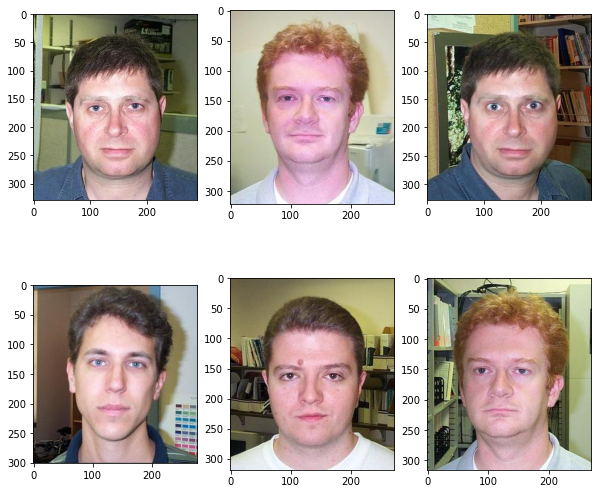

In [7]:
def hellinger(h1, h2):
    return np.sqrt(0.5 * np.sum(np.power(np.sqrt(h1) - np.sqrt(h2), 2)) )

images_list, classes_list = prepare_dataset(10)

distances = []
indexes = []

for i, image in enumerate(images_list):
    image = io.imread("images/faces/" + image)
    image2_reshaped = np.reshape(image, (image.shape[0] * image.shape[1], 3))
    H2, _ = np.histogramdd(image2_reshaped, bins = 8, normed = True)
    H2 = np.reshape(H2, (H2.shape[0] * H2.shape[1] * H2.shape[2]))
    
    hell = hellinger(H1, H2)
    distances.append(1 - hell)
    indexes.append(i)

for i in range(len(distances)):
    for j in range(len(distances) - 1):
        if (np.abs(distances[j]) < np.abs(distances[j+1])):
            distances[j], distances[j+1] = distances[j+1], distances[j]
            indexes[j], indexes[j+1] = indexes[j+1], indexes[j]

all_matches = []
for i in range(300):
    all_matches.append(images_list[indexes[i-1]])

matches = []
for el in all_matches:
    if el not in matches:
        matches.append(el)

_, ax = plt.subplots(2, 3, figsize=(10, 9))
ax[0][0].imshow(image5)
for i in range(1, 6):
    image = io.imread("images/faces/" + matches[i-1])
    ax[i//3][i%3].imshow(image)

 * Implement a system that uses normalized cross-correlation of grayscale images. The normalized cross-correlation between two sequences of same size $\mathbf{X}$ and $\mathbf{Y}$, denoted as $NCC(\mathbf{X},\mathbf{Y})$ is defined as scalar product between normalized sequences:

    \begin{equation}
    NCC(\mathbf{X},\mathbf{Y}) = \frac{1}{N} \frac{\sum  (x_i - \bar{x}) (y_i - \bar{y})}{ \Big(\sqrt{ \frac{1}{N} \sum (x_i - \bar{x})^2 } \Big) \Big(\sqrt{ \frac{1}{N} \sum (y_i - \bar{y})^2 } \Big) }.
    \end{equation}

    where $\bar{x}$ and $\bar{y}$ denote the mean values of the elements in the sequences. Sequences are more similar if the correlation is higher. More information is available <a href="http://en.wikipedia.org/wiki/Cross-correlation">here</a>.
    
    **Note:** One can only compute normalized cross-correlation for grayscale images of the same size. Since our database contains images of different sizes we have to first resize and/or crop images to get them to the reference size (the choice is up to you, but make it larger thatn 64x64 pixels). Then convert them to grayscale and reshape them into vectors of intensity values. 
    
    Repeat the testing of the system in the same manner than in the previous task, load images, convert them to grayscale, select a reference image, compute the distances and display the first five matches. What is the system sensitive to? 



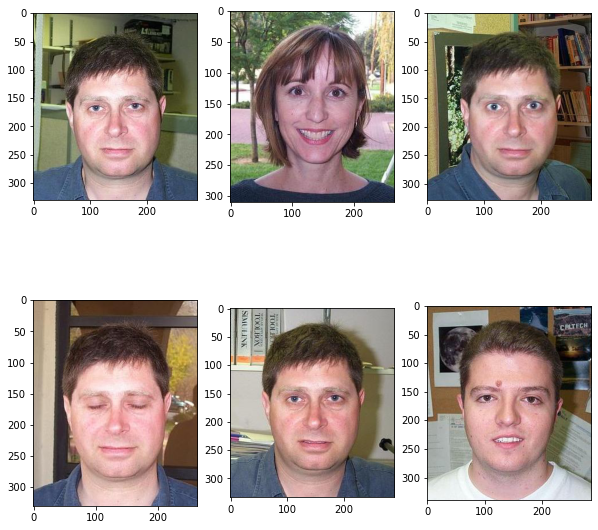

In [23]:
# TODO
def ncc(img1, img2):
    X = np.reshape(img1, (img1.shape[0] * img1.shape[1]))
    Y = np.reshape(img2, (img2.shape[0] * img2.shape[1]))
    x = np.average(X)
    y = np.average(Y)
    N = len(X)
    ncc = (1/N) * np.sum((X-x)*(Y-y)) / ((np.sqrt((1/N) * np.sum(np.power((X-x), 2)))) * 
                                         (np.sqrt((1/N) * np.sum(np.power((Y-y), 2)))) )
    return ncc

img1 = io.imread("images/faces/image_0005.jpg")
img1_gray = np.mean(img1, 2)

ncc_distances = []
ncc_indexes = []

for i, img in enumerate(images_list):
    img2 = io.imread("images/faces/" + img)
    img2_gray = np.mean(img2, 2)
    min_x = min(img1_gray.shape[0], img2_gray.shape[0])
    min_y = min(img1_gray.shape[1], img2_gray.shape[1])
    
    ncc_distances.append(ncc(img1_gray[0:min_x, 0:min_y], img2_gray[0:min_x, 0:min_y]))
    ncc_indexes.append(i)

for i in range(len(ncc_distances)):
    for j in range(len(ncc_distances) - 1):
        if (np.abs(ncc_distances[j]) < np.abs(ncc_distances[j+1])):
            ncc_distances[j], ncc_distances[j+1] = ncc_distances[j+1], ncc_distances[j]
            ncc_indexes[j], ncc_indexes[j+1] = ncc_indexes[j+1], ncc_indexes[j]

all_matches = []
for i in range(300):
    all_matches.append(images_list[ncc_indexes[i-1]])

matches = []
for el in all_matches:
    if el not in matches:
        matches.append(el)
    
_, ax = plt.subplots(2, 3, figsize=(10, 10))
ax[0][0].imshow(img1)
for i in range(1, 6):
    image = io.imread("images/faces/" + matches[i-1])
    ax[i//3][i%3].imshow(image)

 * Implement a retrieval system that uses CNN features to calculate image similarity. You will need the <b>PyTorch</b> library and a pretrained neural network of your choice. Note that architectures of the models are different and you need to check the model documentation to find out which layer contains useful features (but generally it is the penultimate layer). Its features should be one dimensional vectors that you can compare using the Hellinger distance. Plot the ROC curve for the system and comment on its performance related to the NCC and color histogram systems. Help yourself with the sample code below.

In [24]:
import torch
import torch.nn as nn
from torchvision import models
from torchvision import transforms
from PIL import Image

# Get pretrained ALEXNET model (you can also use other models)
# Full list of pretrained models is available at: https://pytorch.org/docs/stable/torchvision/models.html
model = models.alexnet(pretrained=True)

# Remove last fully-connected layer (Second to last layer usually contains useful features)
new_classifier = nn.Sequential(*list(model.classifier.children())[:-1])
model.classifier = new_classifier

# Read an image
image = io.imread("images/airplanes/image_0001.jpg")

# Image transforms (for preprocessing)
# Note: You must check the documentation of your chosen model to see what kind of 
#       preprocessing procedure is required   
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(256), # Resize the image to 256x256
    transforms.CenterCrop(224), # Central crop the image to 224x224
    transforms.ToTensor(), # Convert it to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # Subtract mean value
                         std=[0.229, 0.224, 0.225])  # And normalize it using the std value
])

# Preprocess the input image and prepare a batch to be passed to the model
image_preprocessed = transform(image)
inference_batch = torch.unsqueeze(image_preprocessed, 0)

# Put the model in EVAL (inference) mode
model.eval()

# Perform the inference on the given batch
feature_vector = model(inference_batch)

# Show values of the feature_vector tensor
print(feature_vector)
# Show the shape of the feature_vector tensor
# Note: It should be a one dimensional tensor/vector
print(feature_vector.shape)  

# Convert tensor vector to numpy
# Use this to check image similarities
feature_vector_numpy = feature_vector.detach().numpy()

# Uncomment to print the non-truncated feature vector
# with np.printoptions(threshold=np.inf):
#     print(feature_vector_numpy)
print("konec")

tensor([[0.0000, 0.0000, 0.1124,  ..., 0.0000, 0.0000, 0.0000]],
       grad_fn=<ReluBackward1>)
torch.Size([1, 4096])
konec


0
100
200
300
400
500
600
700
800
['image_0051.jpg', 'image_0076.jpg', 'image_0021.jpg', 'image_0079.jpg', 'image_0034.jpg', 'image_0035.jpg', 'image_0014.jpg', 'image_0010.jpg', 'image_0048.jpg', 'image_0006.jpg', 'image_0071.jpg', 'image_0026.jpg']


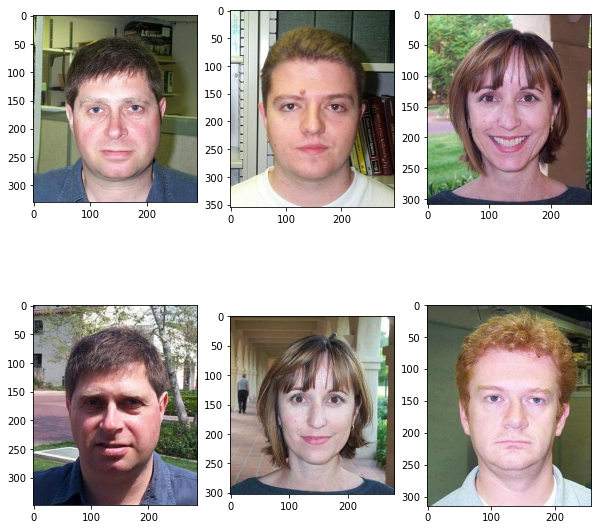

In [25]:
# TODO
img1 = io.imread("images/faces/image_0005.jpg")

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(256), # Resize the image to 256x256
    transforms.CenterCrop(224), # Central crop the image to 224x224
    transforms.ToTensor(), # Convert it to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # Subtract mean value
                         std=[0.229, 0.224, 0.225])  # And normalize it using the std value
])

img1_preprocessed = transform(img1)
interferance_batch = torch.unsqueeze(img1_preprocessed, 0)
model.eval()
feature_vector = model(inference_batch)
feat1 = feature_vector.detach().numpy()

cnn_distances = []
cnn_indexes = []
for i, img in enumerate(images_list):
    if i % 100 == 0: print(i)
    img = io.imread("images/faces/" + img)
#     image = Image.fromarray(image)
    image_preprocessed = transform(img)
    inference_batch = torch.unsqueeze(image_preprocessed, 0)
    model.eval()
    feature_vector = model(inference_batch)
    feat2 = feature_vector.detach().numpy()
    h1 = feat1[0]/max(max(feat1[0]), max(feat2[0]))
    h2 = feat2[0]/max(max(feat1[0]), max(feat2[0]))
    distance = 10 - hellinger(h1, h2)
    cnn_distances.append(distance)
    cnn_indexes.append(i)
    
for i in range(len(cnn_distances)):
    for j in range(len(cnn_distances) - 1):
        if (np.abs(cnn_distances[j]) < np.abs(cnn_distances[j+1])):
            cnn_distances[j], cnn_distances[j+1] = cnn_distances[j+1], cnn_distances[j]
            cnn_indexes[j], cnn_indexes[j+1] = cnn_indexes[j+1], cnn_indexes[j]

            
all_matches = []
for i in range(300):
    all_matches.append(images_list[cnn_indexes[i-1]])

matches = []
for el in all_matches:
    if el not in matches:
        matches.append(el)

print(matches)

_, ax = plt.subplots(2, 3, figsize=(10, 10))
ax[0][0].imshow(img1)
for i in range(1, 6):
    image = io.imread("images/faces/" + matches[i-1])
    ax[i//3][i%3].imshow(image)

 * <b>(5 points)</b> Extend the retrieval method based on color histograms by including spatial information. Divide the input image into subregions, calculate the histogram for reach region, then concatenate the histograms into a final feature vector. Experiment with different numbers of subregions and comment on the performance of the new method.

In [25]:
# TODO: write your code here
import cv2
import numpy as np

def function(subregion_rows, subregion_cols):
    # Divide the image into subregion_rows x subregion_cols subregions
    subregion_height = image_hsv.shape[0] // subregion_rows
    subregion_width = image_hsv.shape[1] // subregion_cols

    # Initialize a list to store the histograms for each subregion
    subregion_histograms = []

    # Iterate through each subregion
    for row in range(subregion_rows):
        for col in range(subregion_cols):
            # Calculate the coordinates for the subregion
            top = row * subregion_height
            bottom = (row + 1) * subregion_height
            left = col * subregion_width
            right = (col + 1) * subregion_width
            subregion = image_hsv[top:bottom, left:right]

            # Calculate the histogram for the subregion
            histogram = cv2.calcHist([subregion], [0], None, [256], [0, 256])

            # Normalize the histogram
            histogram = cv2.normalize(histogram, histogram).flatten()

            # Add the histogram to the list of subregion histograms
            subregion_histograms.append(histogram)

    # Concatenate the subregion histograms into a final feature vector
    feature_vector = np.concatenate(subregion_histograms)
    return feature_vector

# Load and convert the image to HSV color space
image = cv2.imread('images/faces/image_0005.jpg')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


feature_vector_4x4 = function(4, 4)

# 8x8 will divide the image into 64 subregions
feature_vector_8x8 = function(8, 8)
feature_vector_16x16 = function(16, 16)

print("length of feature_vector_4x4: ", len(feature_vector_4x4))
print(feature_vector_4x4[:100])
print("length of feature_vector_8x8: ", len(feature_vector_8x8))
print(feature_vector_8x8[:100])
print("length of feature_vector_16x16: ", len(feature_vector_16x16))
print(feature_vector_16x16[:100])

length of feature_vector_4x4:  4096
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.83020209e-04 0.00000000e+00
 7.72832334e-03 1.44906063e-02 3.67095359e-02 6.32756501e-02
 1.22687131e-01 4.26989853e-01 7.25013316e-01 4.16363418e-01
 2.35713869e-01 9.66040418e-02 1.22204110e-01 7.24530295e-02
 1.83547679e-02 1.30415456e-02 6.76228292e-03 3.13963145e-02
 1.25585254e-02 1.54566467e-02 1.93208084e-02 9.17738397e-03
 1.88377872e-02 4.83020209e-04 1.35245658e-02 2.75321528e-02
 3.86416167e-03 9.66040418e-03 1.44906063e-02 2.84981914e-02
 1.93208084e-03 8.21134355e-03 4.49208803e-02 0.00000000e+00
 1.93208084e-03 0.00000000e+00 4.68529612e-02 9.6

 * **(10 points)** Implement a bag-of-words (BoW) approach for image retrieval. First, extract local features from each image (you can use SIFT or a similar descriptor found in OpenCV library), then generate a codebook via a clustering method (as described <a href="https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision#Codebook_generation">here</a>). The image feature vectors are then histograms of the codewords and can be used for comparison. You do not have to use the entire library to build a dictionary, use just a quater.

    See <a href="https://arxiv.org/abs/1304.5168">the paper</a> for further info on implementation details for BoW image retrieval.

In [1]:
# TODO: write your code here
# import cv2
# import numpy as np
# from sklearn.cluster import KMeans

# # Load the image
# img = cv2.imread('image.jpg')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Detect SIFT keypoints and extract descriptors
# sift = cv2.xfeatures2d.SIFT_create()
# kp, des = sift.detectAndCompute(gray, None)

# # Use only 1/4 of the descriptors for the codebook generation 
# des = des[:len(des)//4]

# # Perform k-means clustering
# k = 100 # number of clusters
# kmeans = KMeans(n_clusters=k)
# kmeans.fit(des)

# # Get the codewords
# codewords = kmeans.cluster_centers_

# # Compute the histogram of codewords for the image
# histogram = np.zeros(k)
# for d in des:
#     codeword = kmeans.predict([d])[0]
#     histogram[codeword] += 1

# # Normalize the histogram
# histogram /= sum(histogram)

## Assignment 3: ROC analysis

The purpose of this assignment is to learn the theory and practical use of ROC analysis. Therefore you should first read <a href="https://www.sciencedirect.com/science/article/pii/S016786550500303X">a paper about ROC curves</a> (*if you do not have access to ScienceDirect from home, then you can use <a href="https://box.vicos.si/borja/mms/Introduction_to_ROC_Analysis.pdf">this link</a> to obtain the paper*). While reading, pay special attention to sections $1$--$5$ and $7$--$8$. In the following tasks you will work on a given theoretical example of two classifiers ($C_1$ and $C_2$).

We have a set of samples that we wish to classify in one of two classes and a ground truth class of each sample (denoted as $0$ and $1$). For each sample a classifier gives us a score based on which we can determine to which class should the sample belong to (score closer to $0$ means class $0$, score closer to $1$ means class $1$). Below are the results for $8$ samples, their ground truth values ($\xi_\mathrm{id}$) and the score values for both classifiers ($\xi_{C_1}$ and $\xi_{C_2}$).

\begin{equation}
    \begin{array}{*{20}c}
            {\xi_\mathrm{id} = } & {\left[ {} \right.} & 1 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & {\left. {} \right]}  \\
            {\xi_{C_1} = } & {\left[ {} \right.} & {0.5} & {0.3} & {0.6} & {0.22} & {0.4} & {0.51} & {0.2} & {0.33} & {\left. {} \right]}  \\
            {\xi_{C_2} = } & {\left[ {} \right.} & {0.04} & {0.1} & {0.68} & {0.22} & {0.4} & {0.11} & {0.8} & {0.53} & {\left. {} \right]}  \\
    \end{array}
\end{equation}

 * For the example above calculate and draw the ROC curves (by hand) for classifier $C_1$ as well as classifier $C_2$. Also calculate the area under the curve (AUC) for both classifiers. For the classifier $C_1$ select a decision threshold (working points) $\vartheta_{th1}=0.33$ and use it to calculate the confusion matrix and the $F$ measure score. Do the same thing for the classifier $C_2$ using a threshold value $\vartheta_{th2}=0.1$.

    **Question:** Based on <a href="https://www.sciencedirect.com/science/article/pii/S016786550500303X">Fawcett theory</a> decide which classifier is better in the selected working points and motivate your decision. Which working point is optimal for each classifier?

In [5]:
def print_confusion_matrix(c, rates):
    print("CONFUSION MATRIX FOR C" + str(c+1))
    print("|-----|-----|-----|")
    print("|     |  p  |  n  |")
    print("|  Y  |  " + str(rates[0]) + "  |  " + str(rates[1]) + "  |")
    print("|  N  |  " + str(rates[3]) + "  |  " + str(rates[2]) + "  |")
    print("|-----|-----|-----|")

CONFUSION MATRIX FOR C1
|-----|-----|-----|
|     |  p  |  n  |
|  Y  |  3  |  1  |
|  N  |  1  |  3  |
|-----|-----|-----|
F-measure:  0.75
AUC:  0.6875


CONFUSION MATRIX FOR C2
|-----|-----|-----|
|     |  p  |  n  |
|  Y  |  3  |  3  |
|  N  |  1  |  1  |
|-----|-----|-----|
F-measure:  0.6000000000000001
AUC:  0.4375




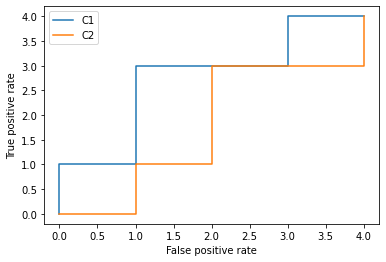

In [6]:
# TODO
truth_class = [1, 0, 1, 1, 1, 0, 0, 0]
c1 = [0.5, 0.3, 0.6, 0.22, 0.4, 0.51, 0.2, 0.33]
c2 = [0.04, 0.1, 0.68, 0.22, 0.4, 0.11, 0.8, 0.53]

c_both = [c1, c2]
thresholds = [0.33, 0.1]

ROC_curves = [[], []]
F_measures = []
AUCs = []

# calculate and draw the ROC curves, calculate AUC (area under the curve)
plt.figure()

for c in range(2):
    sorted = []
    R = truth_class.copy()
    predictions = c_both[c]  # true positives and false positives
    sorted = [i for i in predictions]
    
    # SORTIRANJE
    for i in range(len(sorted)):
        for j in range(len(sorted)-1):
            if np.abs(sorted[j]) < np.abs(sorted[j+1]):
                sorted[j], sorted[j+1] = sorted[j+1], sorted[j]
                R[j], R[j+1] = R[j+1], R[j]
                
    # confusion matrix
    threshold = thresholds[c]
    cols = ('p', 'n')
    rows = ('Y', 'N')
    rates = [0, 0, 0, 0] # [TP, FP, TN, FN]
    
    for i in range(len(sorted)):
        if sorted[i] > threshold:  # positive
            if R[i] == 1:          # classified as positive
                rates[0] += 1
            else:
                rates[1] += 1
        else:             # negative
            if R[i] == 0: # classified as negative
                rates[2] += 1
            else:
                rates[3] += 1
    precision = rates[0] / (rates[0] + rates[1])  # TP / (TP + FP)
    recall = rates[0] / (rates[0] + rates[3])     # TP / 
    F_measure = 2 / ((1 / precision) + (1 / recall))
    F_measures.append(round(F_measure, 2))
    #print(precision, recall, F_measure)
    # print(rates)
    
    # print confusion matrix
    print_confusion_matrix(c, rates)
    
    print("F-measure: ", F_measure)
    
    # računanje in risanje grafa
    
    # ones: y axsis, zeros: x axsis
    ones = np.count_nonzero(R)
    zeros = len(R) - np.count_nonzero(R)
    
    povrsina = 0.0
    count0, count1 = 0, 0
    x, y = [0], [0]
    
    sorted.append(-10000)
    
    for i in range(len(sorted) - 1):
        if sorted[i] == sorted[i+1]:
            if R[i] == 1:
                count1 += 1
            else:
                count0 += 1
        else:
            if R[i] == 1:
                count1 += 1
            else:
                count0 += 1
            
            if count0 > 0 and count1 > 0:
                povrsina += np.count_nonzero(R[i:]) * count1 + 0.5 * (stevec0 * stevec1)
            elif count1 > 0:
                povrsina += len(R[i:]) - np.count_nonzero(R[i:]) * count1
            elif count0 > 0:
                pass
            count0, count1 = 0, 0
            x.append(ones - np.count_nonzero(R[i:]))
            y.append(zeros - (len(R[i:]) - np.count_nonzero(R[i:])))
    
    x.append(4)
    y.append(4)
    
    ROC_curves[c].append(y)
    ROC_curves[c].append(x)
    
    plt.plot(y, x)
    
    AUC = povrsina / (zeros * ones)
    AUCs.append(AUC)
    print("AUC: ", AUC)
    print("\n")
    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(["C1", "C2"])
plt.show()

# Question: Based on Fawcett theory decide which classifier is better in the selected working 
# points and motivate your decision. 
# Which working point is optimal for each classifier?

# Boljši je C1. AUC (area under curve) za C1 je večja => napovedi so v povprečju boljše

 * You will now calculate ROC curves for <i>combined classifiers</i>. We have two binary classifiers, $C_1$ ($\vartheta_{th1}=0.33$) and $C_2$ ($\vartheta_{th2}=0.1$), which means that the classifier $C_1$ classifies a sample as class $1$, if its score is $\xi_{C_1}(\mathbf{x}_i) > \vartheta_{th1}$, otherwise it classifies it as class $0$, similarly can be said about classifier $C_2$. The first combined classifier $C_3$ can be obtained as the intersection of decisions of the two basic classifiers, $C_3 = C_1 \bigwedge C_2$ ($C_3$ classifies a sample as class $1$ if both basic classifiers classify it as class $1$). The second one can be obtained as an union of the decisions of the two basic classifiers, $C_4 = C_1 \bigvee C_2$ ($C_4$ classifies a sample as class $1$ if at least one of the basic classifiers classifies it as class $1$). For each combined classifier calculate and plot its point in the ROC space together with the ROC curves from previous tasks.

In [7]:
def calculate_class(c_all, truth_class, print_matrix):
    razred = []
    for c in range(len(c_all)):
        rates = [0, 0, 0, 0]  # [TP, FP, TN, FN]
        x = c_all[c]
        for i in range(len(x)):
            if x[i] == 1:                #positive
                if truth_class[i] == 1:  # classified as positive
                    rates[0] += 1
                else:
                    rates[1] += 1
            else:                        # negative
                if truth_class[i] == 1:  #classified as negative
                    rates[3] += 1
                else:
                    rates[2] += 1
                    
        # print confusion matrix
        if print_matrix:  print_confusion_matrix(c, rates)
                    
        sensitivity, specificity = 0, 0
        if rates[0] + rates[1] == 0:
            sensitivity = 1
        else:
            sensitivity =  rates[0] / (rates[0] + rates[3])  # = recall = TP / (TP + FN)

        if rates[2] + rates[3] == 0:
            specificity = 1
        else:
            specificity = rates[1] / (rates[1] + rates[2])  # TN / (TN + FP)
        razred.append([sensitivity*4, specificity*4])
    return razred, rates

CONFUSION MATRIX FOR C1
|-----|-----|-----|
|     |  p  |  n  |
|  Y  |  3  |  1  |
|  N  |  1  |  3  |
|-----|-----|-----|
CONFUSION MATRIX FOR C2
|-----|-----|-----|
|     |  p  |  n  |
|  Y  |  3  |  3  |
|  N  |  1  |  1  |
|-----|-----|-----|
CONFUSION MATRIX FOR C3
|-----|-----|-----|
|     |  p  |  n  |
|  Y  |  2  |  1  |
|  N  |  2  |  3  |
|-----|-----|-----|
CONFUSION MATRIX FOR C4
|-----|-----|-----|
|     |  p  |  n  |
|  Y  |  4  |  3  |
|  N  |  0  |  1  |
|-----|-----|-----|
razred:  [[3.0, 1.0], [3.0, 3.0], [2.0, 1.0], [4.0, 3.0]]
ROC curves:  [[[0, 0, 0, 1, 1, 1, 2, 3, 3, 4], [0, 0, 1, 1, 2, 3, 3, 3, 4, 4]], [[0, 0, 1, 1, 2, 2, 2, 3, 4, 4], [0, 0, 0, 1, 1, 2, 3, 3, 3, 4]]]


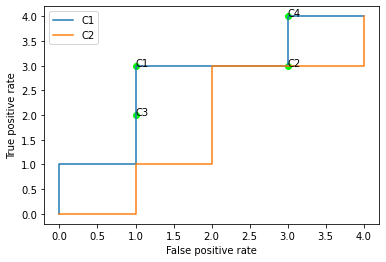

In [8]:
# TODO
truth_class = [1, 0, 1, 1, 1, 0, 0, 0]
c1 = [0.5, 0.3, 0.6, 0.22, 0.4, 0.51, 0.2, 0.33]
c2 = [0.04, 0.1, 0.68, 0.22, 0.4, 0.11, 0.8, 0.53]
n = len(c1)

thresholds = [0.33, 0.1]

predikat1 = []
predikat2 = []
presek = []
unija = []

# logicni racuni
for i in range(n):
    if c1[i] > thresholds[0] and c2[i] > thresholds[1]:
        predikat1.append(1)
        predikat2.append(1)
        presek.append(1)
        unija.append(1)
    elif c1[i] > thresholds[0] and c2[i] <= thresholds[1]:
        predikat1.append(1)
        predikat2.append(0)
        presek.append(0)
        unija.append(1)
    elif c1[i] <= thresholds[0] and c2[i] > thresholds[1]:
        predikat1.append(0)
        predikat2.append(1)
        presek.append(0)
        unija.append(1)
    else:
        predikat1.append(0)
        predikat2.append(0)
        presek.append(0)
        unija.append(0)

c_all = [predikat1, predikat2, presek, unija]

# calculate class
# last argument prints confusion matrix
razred, rates = calculate_class(c_all, truth_class, True)
    
print("razred: ", razred)
print("ROC curves: ", ROC_curves)

x = [i[1] for i in razred]
y = [i[0] for i in razred]

plt.figure()
for p in ROC_curves:
    plt.plot(p[0], p[1])
plt.scatter(x, y, c='#00ff00')

labels = ['C1', 'C2', 'C3', 'C4']
for i, label in enumerate(labels):
    plt.annotate(label, (x[i], y[i]))
    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(["C1", "C2"])
plt.show()

* Use [sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) to calculate ROC cruves. Study the documentation and reproduce results for the classifiers from the previous task. To obtain AUC you can use [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score).

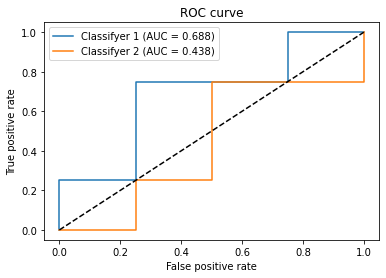

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

# TODO

# Set up the truth class and classifyer outputs
truth_class = [1, 0, 1, 1, 1, 0, 0, 0]
c1 = [0.5, 0.3, 0.6, 0.22, 0.4, 0.51, 0.2, 0.33]
c2 = [0.04, 0.1, 0.68, 0.22, 0.4, 0.11, 0.8, 0.53]

# Calculate the ROC curves and AUC values for the classifyers
fpr_c1, tpr_c1, _ = roc_curve(truth_class, c1)
auc_c1 = roc_auc_score(truth_class, c1)

fpr_c2, tpr_c2, _ = roc_curve(truth_class, c2)
auc_c2 = roc_auc_score(truth_class, c2)

# Plot the ROC curves
plt.plot(fpr_c1, tpr_c1, label='Classifyer 1 (AUC = {:.3f})'.format(auc_c1))
plt.plot(fpr_c2, tpr_c2, label='Classifyer 2 (AUC = {:.3f})'.format(auc_c2))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

 * [Fawcett et al.](https://www.sciencedirect.com/science/article/pii/S016786550500303X) explains how to select an optimal working point for a classifier from a ROC curve. The threshold should be at the point on the curve that is the closest to the point $[0,1]$ in the ROC space. Write a function **get_wp** that calculates the optimal working point for the given ROC curve and returns the corresponding threshold value and $F$ score value as results. Test your code on classifiers $C_1$ and $C_2$. Based on the AUC decide which classifier is performing better over all threshold values, based on the $F$ score at the optimal working point decide which classifier is better at this point. Write a script that calculates and draws ROC curves for classifiers $C_1$ and $C_2$ on the same plot, for both classifiers mark the optimal working point and set the title of the plot to display values of the thresholds, $F$ scores and AUC for both classifiers.

Razred:  [[3.0, 1.0], [3.0, 3.0]]

F-measure for C1 :  0.75
AUC for C1 :  0.6875

F-measure for C2 :  0.6
AUC for C2 :  0.4375


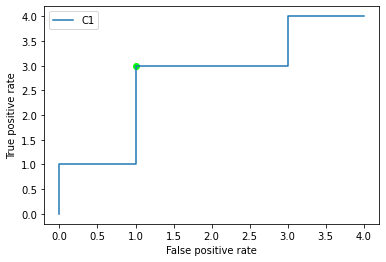

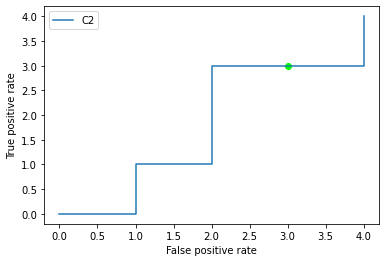

In [10]:
# TODO
truth_class = [1, 0, 1, 1, 1, 0, 0, 0]
c1 = [0.5, 0.3, 0.6, 0.22, 0.4, 0.51, 0.2, 0.33]
c2 = [0.04, 0.1, 0.68, 0.22, 0.4, 0.11, 0.8, 0.53]
n = len(c1)

thresholds = [0.33, 0.1]

predikat1 = []
predikat2 = []

# logicni racuni
for i in range(n):
    if c1[i] > thresholds[0] and c2[i] > thresholds[1]:
        predikat1.append(1)
        predikat2.append(1)
    elif c1[i] > thresholds[0] and c2[i] <= thresholds[1]:
        predikat1.append(1)
        predikat2.append(0)
    elif c1[i] <= thresholds[0] and c2[i] > thresholds[1]:
        predikat1.append(0)
        predikat2.append(1)
    else:
        predikat1.append(0)
        predikat2.append(0)
        
c_all = [predikat1, predikat2]

razred, rates = calculate_class(c_all, truth_class, 0)

print("Razred: ", razred)

x = [i[1] for i in razred]
y = [i[0] for i in razred]

legend = ["C1", "C2"]

for i in range(2):
    plt.figure()
    izrisi = ROC_curves[i]
    plt.plot(izrisi[0], izrisi[1])
    plt.scatter(x[i], y[i], c='#00ff00')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend([legend[i]])
    
    print("\nF-measure for", legend[i], ": ", F_measures[i])
    print("AUC for", legend[i], ": ", AUCs[i])
    
#     plt.plot(p[0], p[1])
# plt.scatter(x, y, c='#00ff00')

# labels = ['C1', 'C2', 'C3', 'C4']
# for i, label in enumerate(labels):
#     plt.annotate(label, (x[i], y[i]))
    
# plt.legend(["C1", "C2"])
plt.show()

 * The image retrieval systems can currently return distances between each image in the database to the reference image. If we want to build a binary classifier we have to determine the optimal threshold that can be used to decide if a classifier belongs to the class of the reference image or not. We will use ROC analysis that you have implemented in the previous assignment. Use the ROC curves to determine optimal threshold. You can use an image in the database as a reference image and compute distances to every other image in the dataset. If we select the first image we can generate a ROC curve for that image, however, this curve only tells us the properties of the system for this input and may not be generalizable. If we select a different image we can get a completely different ROC curve with a different optimal point. Instead, use the following procedure to compute the ROC curve over all images in the database.

      1. Load the database.
      2. For each image in the database:
          * Use the selected image as a reference image.</li>
          * Compute the distance between the reference image and the remaining images in the database and store the distances to vector $\vartheta_\mathrm{score}$<br>(the vector must not include distance to the reference image itself).
          * Use the provided label ground truth data to compose a vector of binary ground truth for the given reference image by comparing it to the class of the reference image. Save the binary ground truth to vector $\vartheta_\mathrm{class}$.
          * Extend the overall vectors for scores and ground truth by appending the new data: $\varphi_\mathrm{class} = \varphi_\mathrm{class} + \vartheta_\mathrm{class}$ and $\varphi_\mathrm{score} = \varphi_\mathrm{score} + \vartheta_\mathrm{score}$.  
      3. Use the composed overall vectors $\varphi_\mathrm{score}$ and $\varphi_\mathrm{class}$ to compute the ROC curve.
   
   Evaluate all three systems by plotting their ROC curves and compare them. Determine the optimal threshold value, plot it in the ROC space (on top of the ROC curve). Do not forget to label the axes of the plot.
   
   **Note:** Pay attention to the values produced by individual distance measures, some measures produce lower values when samples are more alike, some produce higher values in such cases.

In [4]:
# TODO: write your code here
import os
import numpy as np

def create_matrix(root_folder):
    folders = [f for f in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, f))]
    images = []
    for folder in folders:
        images_in_folder = [f for f in os.listdir(os.path.join(root_folder, folder)) if f.endswith('.jpg') or f.endswith('.png') or f.endswith('.jpeg')]
        images.append(images_in_folder)
    
    matrix = np.zeros((sum(map(len,images)), sum(map(len,images))))
    
    for i in range(len(images)):
        for j in range(len(images[i])):
            for k in range(i, len(images)):
                for l in range(len(images[k])):
                    if i == k and j == l:
                        matrix[sum(map(len,images[:i]))+j][sum(map(len,images[:k]))+l] = 1
                    elif i == k:
                        matrix[sum(map(len,images[:i]))+j][sum(map(len,images[:k]))+l] = 1
                    else:
                        matrix[sum(map(len,images[:i]))+j][sum(map(len,images[:k]))+l] = 0
    return matrix

h = create_matrix("images")
print("konec")

konec


In [11]:
print(h[:1])

4998


In [ ]:
import os

def build_dict(root_folder):
    # Initialize the dictionary
    img_dict = {}
    i = 0
    i += 1
    # Iterate over the subfolders in the root folder
    if i > 2: return img_dict
    else:
        for subfolder in os.listdir(root_folder):
            subfolder_path = os.path.join(root_folder, subfolder)
            if os.path.isdir(subfolder_path):
                # Iterate over the images in the subfolder
                for image in os.listdir(subfolder_path):
                    image_path = os.path.join(subfolder_path, image)
                    if os.path.isfile(image_path):
                        # Create a key for the dictionary that is a tuple of the path and image name
                        key = (subfolder_path, image)
                        img_dict[key] = []
                        
                        for subfolder2 in os.listdir(root_folder):
                            subfolder2_path = os.path.join(root_folder, subfolder2)
                            if os.path.isdir(subfolder2_path):
                                for image2 in os.listdir(subfolder2_path):
                                    print(image2)
                                    if os.path.isfile(image2):
                                        if subfolder_path == subfolder2_path:
                                            img_dict[key].append(1)
                                        else:
                                            img_dict[key].append(0)

    return img_dict

hh = build_dict("images")
print("konec")

In [9]:
i = 0
for key, value in hh.items() :
    if i > 22: 
        break
    else: 
        print (key, value)
    i += 1

('images/ibis', 'image_0029.jpg') []
('images/ibis', 'image_0076.jpg') []
('images/ibis', 'image_0048.jpg') []
('images/ibis', 'image_0050.jpg') []
('images/ibis', 'image_0051.jpg') []
('images/ibis', 'image_0079.jpg') []
('images/ibis', 'image_0058.jpg') []
('images/ibis', 'image_0042.jpg') []
('images/ibis', 'image_0014.jpg') []
('images/ibis', 'image_0071.jpg') []
('images/ibis', 'image_0004.jpg') []
('images/ibis', 'image_0065.jpg') []
('images/ibis', 'image_0068.jpg') []
('images/ibis', 'image_0059.jpg') []
('images/ibis', 'image_0026.jpg') []
('images/ibis', 'image_0073.jpg') []
('images/ibis', 'image_0032.jpg') []
('images/ibis', 'image_0075.jpg') []
('images/ibis', 'image_0066.jpg') []
('images/ibis', 'image_0010.jpg') []
('images/ibis', 'image_0049.jpg') []
('images/ibis', 'image_0031.jpg') []
('images/ibis', 'image_0056.jpg') []


* **(5 points)** Compare performance of several deep descriptors (e.g. ResNet family, VGG) using ROC analysis. Download pretrained networks and extract the feature extraction part of the model (remove the fully-connected layers at the end). It is a good idea to pre-compute the features for parts of the dataset and store them on the disk, then load them for further analysis to save time.

In [ ]:
# TODO: write your code here
# import numpy as np
# import pandas as pd
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt

# # Import pretrained networks (e.g. ResNet family, VGG)
# import torch
# import torchvision
# import torchvision.transforms as transforms
# from torchvision import models
# print("000000000000000000000000")

# # Extract feature extraction part of the model (remove the fully-connected layers at the end)
# resnet18 = models.resnet18(pretrained=True)
# resnet18 = torch.nn.Sequential(*list(resnet18.children())[:-1])

# vgg16 = models.vgg16(pretrained=True)
# vgg16 = torch.nn.Sequential(*list(vgg16.children())[:-1])

# # Pre-compute features for parts of the dataset and store them on the disk
# def extract_features(net, dataloader):
#     features = []
#     labels = []
#     for data, label in dataloader:
#         output = net(data)
#         features.append(output.detach().numpy())
#         labels.append(label.detach().numpy())
#     return np.concatenate(features), np.concatenate(labels)
# print("11111111111111")
